# Import Library

In [108]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

# Dataset import and preparation

In [109]:
csv_file_path = "loan_data_2007_2014.csv"
ftdf = pd.read_csv(csv_file_path, index_col=0)
ftdf.head(1)
ftdf.shape

(466285, 74)

In [110]:
columns = list(ftdf.columns)
columns.sort()

ftdf = ftdf[columns]
ftdf.head(1)

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0.0,AZ,NaN,24000.0,NaN,INDIVIDUAL,0.0,0.0,0.0,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1.0,162.87,10.65,Dec-11,Jan-16,171.62,Jan-15,5000,Fully Paid,NaN,1296599,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0.0,credit_card,n,0.0,13648,83.7,B2,36 months,Computer,NaN,NaN,9.0,NaN,NaN,5861.071414,5831.78,861.07,0.0,5000.0,NaN,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,NaN,860xx


# EDA data numerik

In [111]:
ftdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   acc_now_delinq               466256 non-null  float64
 1   addr_state                   466285 non-null  object 
 2   all_util                     0 non-null       float64
 3   annual_inc                   466281 non-null  float64
 4   annual_inc_joint             0 non-null       float64
 5   application_type             466285 non-null  object 
 6   collection_recovery_fee      466285 non-null  float64
 7   collections_12_mths_ex_med   466140 non-null  float64
 8   delinq_2yrs                  466256 non-null  float64
 9   desc                         125983 non-null  object 
 10  dti                          466285 non-null  float64
 11  dti_joint                    0 non-null       float64
 12  earliest_cr_line             466256 non-null  object 
 13 

In [112]:
colnames = ftdf.columns

NA_pct = []

for col in colnames:
    
    NA_pct.append([round((ftdf[col].isna().sum() / ftdf.shape[0]) * 100, 2), ftdf[col].nunique(), ftdf[col].unique()[:5]])
    
NA_pct = pd.DataFrame(NA_pct, index = [colnames], columns = ['Persentase NA', 'Banyak Nilai Unik', "Sampel Nilai Unik"]).reset_index()

NA_pct.rename(columns={"level_0": "Fitur"}, inplace=True)

NA_pct

,Fitur,Persentase NA,Banyak Nilai Unik,Sampel Nilai Unik
0,acc_now_delinq,0.01,6,"[0.0, 1.0, nan, 2.0, 3.0]"
1,addr_state,0.00,50,"[AZ, GA, IL, CA, OR]"
2,all_util,100.00,0,[nan]
3,annual_inc,0.00,31901,"[24000.0, 30000.0, 12252.0, 49200.0, 80000.0]"
4,annual_inc_joint,100.00,0,[nan]
5,application_type,0.00,1,[INDIVIDUAL]
6,collection_recovery_fee,0.00,20275,"[0.0, 1.11, 2.09, 2.52, 4.16]"
7,collections_12_mths_ex_med,0.03,9,"[0.0, nan, 1.0, 2.0, 4.0]"
8,delinq_2yrs,0.01,24,"[0.0, 2.0, 3.0, 1.0, 4.0]"
9,desc,72.98,124436,"[ Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>, Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>, nan, Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>, Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay towar..."


# Drop fitur dengan persentase NA > 20% dan fitur member_id dan id

In [113]:
deleted_col = list(NA_pct[NA_pct['Persentase NA'] > 20]['Fitur']) + ['member_id', 'id']
deleted_col

['all_util',
 'annual_inc_joint',
 'desc',
 'dti_joint',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'next_pymnt_d',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_il_6m',
 'open_rv_12m',
 'open_rv_24m',
 'total_bal_il',
 'total_cu_tl',
 'verification_status_joint',
 'member_id',
 'id']

In [114]:
ftdf.drop(labels = deleted_col, axis = 1, inplace = True)
ftdf.shape

(466285, 50)

# Membuat label dari fitur loan_status

In [115]:
loan_status = ftdf['loan_status'].value_counts()
loan_status

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

# Label akan terdiri dari 2 jenis, good(1) dan bad(0)

In [116]:
good = ['Current','Fully Paid']
bad = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid', 'Late (16-30 days)' 
       'Default', 'Does not meet the credit policy. Status:Charged Off']
def add_Label(values):  
    if values in good:
        return 1
    return 0

In [118]:
new_ftdf = ftdf[ftdf['loan_status'].isin(good + bad)].copy()
new_ftdf['loan_status'] = new_ftdf['loan_status'].apply(add_Label)
new_ftdf.head(1)

,acc_now_delinq,addr_state,annual_inc,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,zip_code
0,0.0,AZ,24000.0,INDIVIDUAL,0.0,0.0,0.0,27.65,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,f,1.0,162.87,10.65,Dec-11,Jan-16,171.62,Jan-15,5000,1,3.0,0.0,0.0,1,0.0,credit_card,n,0.0,13648,83.7,B2,36 months,Computer,NaN,NaN,9.0,5861.071414,5831.78,861.07,0.0,5000.0,NaN,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,860xx


In [119]:
new_ftdf.shape

(464235, 50)

In [120]:
new_ftdf['loan_status'].value_counts()

1    408965
0     55270
Name: loan_status, dtype: int64

# Korelasi

In [121]:
correl = (new_ftdf.select_dtypes(exclude=object)
                .corr()
                .dropna(how="all", axis=0)
                .dropna(how="all", axis=1)
)
correl

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,loan_status,open_acc,out_prncp,out_prncp_inv,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
acc_now_delinq,1.000000,0.017062,0.001394,0.018907,0.126774,0.009547,0.006392,0.006721,-0.006817,0.008810,0.030390,-0.000963,0.006202,0.000945,0.018373,0.016344,0.016340,0.002367,0.002783,0.001008,-0.022691,-0.000028,0.023775,0.027733,-0.004280,-0.003942,0.009429,0.002707,-0.008574,0.009241
annual_inc,0.017062,1.000000,0.013667,-0.000381,0.059002,-0.188382,0.369952,0.367442,0.056618,0.367830,-0.046106,0.142192,0.370535,0.047531,0.157865,0.168015,0.168015,-0.015426,0.016931,0.332066,0.037438,0.001892,0.485920,0.224702,0.299534,0.298473,0.212677,0.019700,0.275688,0.291631
collection_recovery_fee,0.001394,0.013667,1.000000,-0.000341,0.005486,0.018226,0.077451,0.074037,0.032847,0.075597,0.082647,-0.048035,0.077596,-0.285776,0.012174,-0.072659,-0.072654,-0.006980,0.800657,0.015163,0.021259,-0.000309,0.009059,0.016214,-0.001028,-0.003867,0.028402,0.070093,-0.074232,0.007031
collections_12_mths_ex_med,0.018907,-0.000381,-0.000341,1.000000,0.039293,0.000285,-0.007628,-0.006979,-0.002046,-0.005825,0.020182,-0.009704,-0.007874,0.005073,0.011897,0.020445,0.020438,0.021564,-0.000984,-0.016063,-0.027651,0.006677,-0.004432,0.013277,-0.024591,-0.023964,-0.007940,-0.000328,-0.026021,-0.011520
delinq_2yrs,0.126774,0.059002,0.005486,0.039293,1.000000,-0.004062,0.007188,0.007944,0.018131,0.016830,0.079299,-0.013447,0.006642,-0.003515,0.058846,0.043275,0.043270,-0.011097,0.004624,-0.030979,-0.013122,0.000068,0.072695,0.130559,-0.019458,-0.018756,0.024309,0.023582,-0.031816,-0.034945
dti,0.009547,-0.188382,0.018226,0.000285,-0.004062,1.000000,0.058800,0.062746,-0.012423,0.050073,0.159586,-0.042754,0.057442,-0.044446,0.303777,0.119651,0.119639,-0.046364,0.021660,0.143534,0.200724,-0.003548,-0.018340,0.228139,-0.025576,-0.021346,0.089832,-0.005784,-0.063422,0.060943
funded_amnt,0.006392,0.369952,0.077451,-0.007628,0.007188,0.058800,1.000000,0.996107,-0.021019,0.951811,0.167460,0.305194,0.998541,-0.005915,0.205100,0.520077,0.520038,-0.080379,0.110718,0.331083,0.118782,-0.002861,0.332602,0.235139,0.743883,0.743948,0.715412,0.042061,0.613265,0.290111
funded_amnt_inv,0.006721,0.367442,0.074037,-0.006979,0.007944,0.062746,0.996107,1.000000,-0.027665,0.947390,0.168884,0.304129,0.994320,0.001142,0.205924,0.523774,0.523746,-0.078676,0.108323,0.327468,0.120677,-0.002860,0.332596,0.235462,0.738547,0.745986,0.713191,0.037620,0.607969,0.290091
inq_last_6mths,-0.006817,0.056618,0.032847,-0.002046,0.018131,-0.012423,-0.021019,-0.027665,1.000000,0.002201,0.205567,0.041551,-0.020372,-0.109102,0.092547,-0.071161,-0.071150,0.038238,0.043122,-0.015626,-0.094528,0.001895,0.060355,0.124006,0.020782,0.014879,0.043785,0.030273,0.005574,0.008418
installment,0.008810,0.367830,0.075597,-0.005825,0.016830,0.050073,0.951811,0.947390,0.002201,1.000000,0.148331,0.300837,0.949680,-0.010027,0.197024,0.407444,0.407416,-0.069908,0.106029,0.320272,0.136756,-0.002360,0.300612,0.215983,0.764766,0.764285,0.641632,0.051098,0.664177,0.269996


In [122]:
correl['loan_status'].sort_values(ascending = False)

loan_status                   1.000000
total_rec_prncp               0.249624
total_pymnt_inv               0.194877
total_pymnt                   0.190036
last_pymnt_amnt               0.172399
out_prncp                     0.150610
out_prncp_inv                 0.150597
tot_cur_bal                   0.050449
annual_inc                    0.047531
total_rev_hi_lim              0.038910
total_acc                     0.024154
total_rec_int                 0.019729
revol_bal                     0.011009
pub_rec                       0.009893
open_acc                      0.007250
collections_12_mths_ex_med    0.005073
funded_amnt_inv               0.001142
tot_coll_amt                  0.001108
acc_now_delinq                0.000945
delinq_2yrs                  -0.003515
funded_amnt                  -0.005915
loan_amnt                    -0.006897
installment                  -0.010027
dti                          -0.044446
revol_util                   -0.051721
inq_last_6mths           

In [123]:
min_correl, max_correl = 0.1, 0.99

pos_correl = (correl > min_correl) & (correl < max_correl)
neg_correl = (correl > -max_correl) & (correl < -min_correl)

# Nilai mutlak korelasi
filter_correl = correl[pos_correl | neg_correl]

In [124]:
fiturHC = filter_correl[(filter_correl >= 0.5) & (filter_correl <= 0.8)]
fiturLC = filter_correl[(filter_correl >= 0.2) & (filter_correl < 0.5)]

In [125]:
selected_fiturHC = fiturHC.columns[fiturHC.notnull().any()].tolist()
selected_fiturHC

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'last_pymnt_amnt',
 'loan_amnt',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp']

In [126]:
selected_fiturLC = fiturLC.columns[fiturLC.notnull().any()].tolist()
selected_fiturLC

['annual_inc',
 'dti',
 'funded_amnt',
 'funded_amnt_inv',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'loan_status',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'revol_bal',
 'revol_util',
 'tot_cur_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim']

In [127]:
fiturnumerik = set(selected_fiturHC).union(set(selected_fiturLC))
fiturnumerik = list(fiturnumerik)
fiturnumerik.sort()
fiturnumerik, len(fiturnumerik)

(['annual_inc',
  'dti',
  'funded_amnt',
  'funded_amnt_inv',
  'inq_last_6mths',
  'installment',
  'int_rate',
  'last_pymnt_amnt',
  'loan_amnt',
  'loan_status',
  'open_acc',
  'out_prncp',
  'out_prncp_inv',
  'revol_bal',
  'revol_util',
  'tot_cur_bal',
  'total_acc',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_int',
  'total_rec_prncp',
  'total_rev_hi_lim'],
 22)

In [128]:
new_ftdf[list(fiturnumerik)]

In [129]:
y = new_ftdf['loan_status']

In [130]:
new_ftdf.drop('loan_status', inplace = True, axis = 1)

In [131]:
fiturnumerik.remove('loan_status')

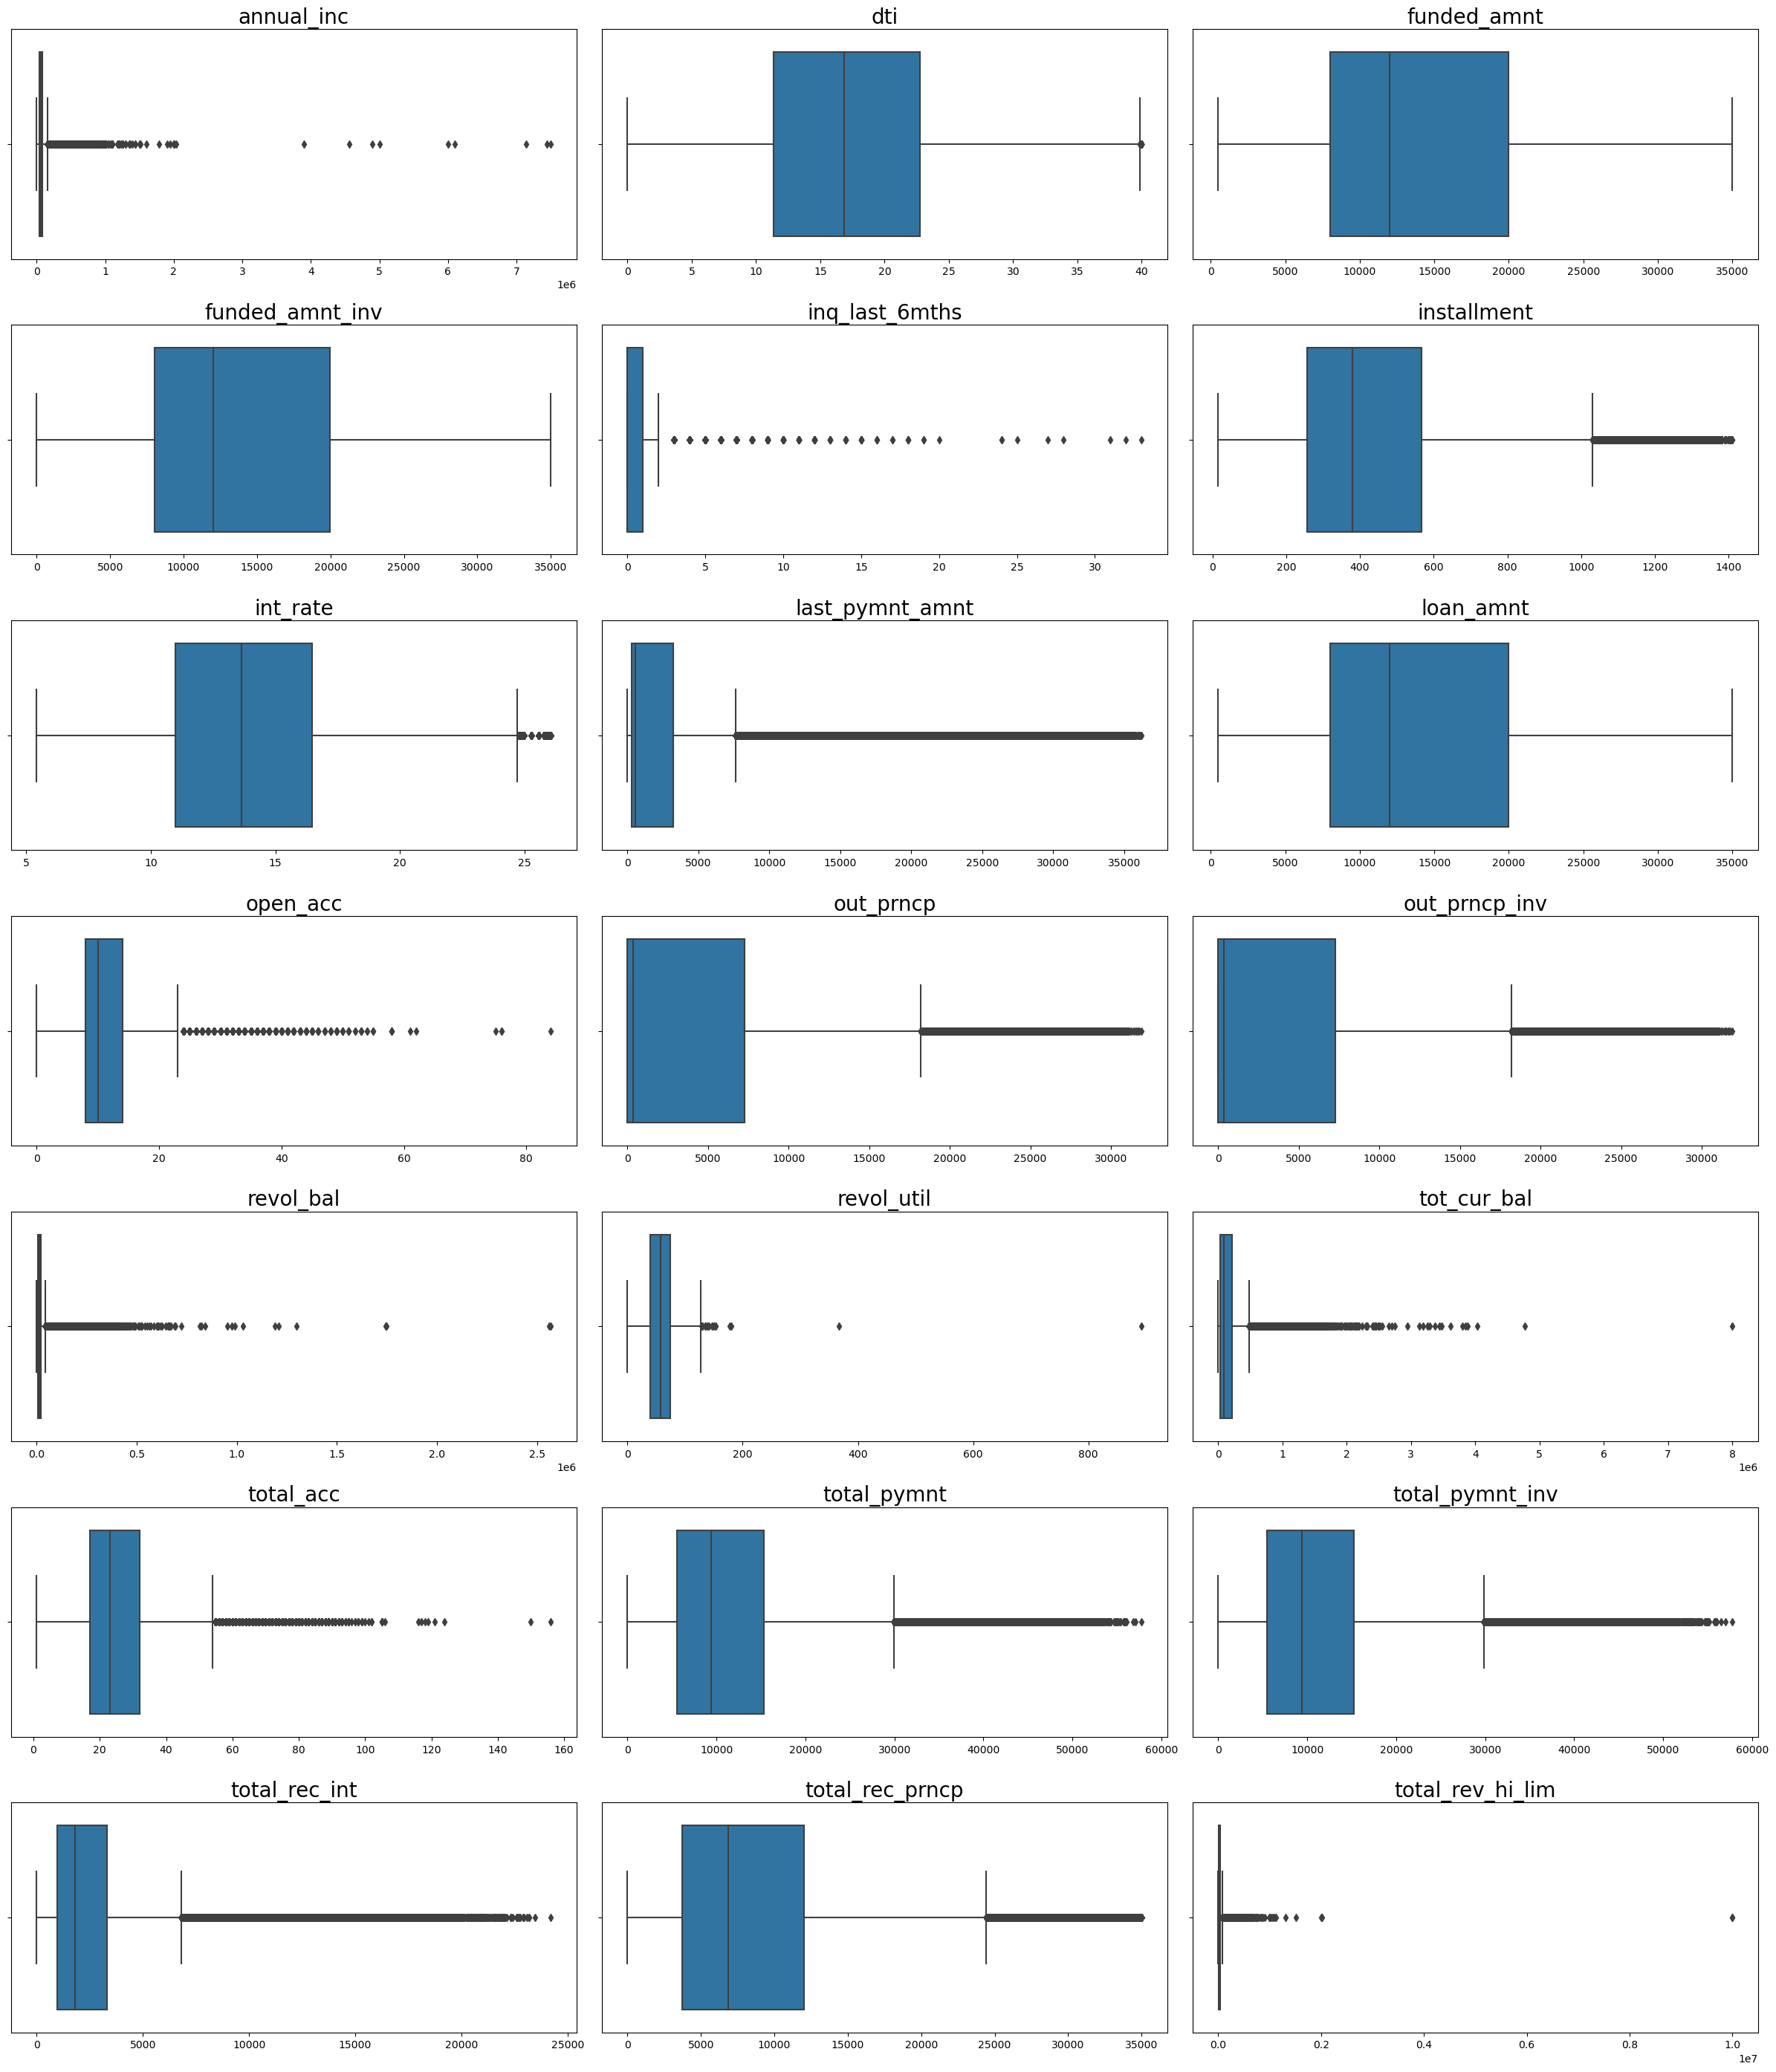

In [132]:
plt.figure(figsize=(24,28))
i = 1
for colname in fiturnumerik:
    plt.subplot(7, 3, i)
    sns.boxplot(x=new_ftdf[list(fiturnumerik)][colname])
    plt.title(colname, fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()
    i += 1

In [133]:
new_ftdf[fiturnumerik].isna().sum()

annual_inc              4
dti                     0
funded_amnt             0
funded_amnt_inv         0
inq_last_6mths         29
installment             0
int_rate                0
last_pymnt_amnt         0
loan_amnt               0
open_acc               29
out_prncp               0
out_prncp_inv           0
revol_bal               0
revol_util            339
tot_cur_bal         70231
total_acc              29
total_pymnt             0
total_pymnt_inv         0
total_rec_int           0
total_rec_prncp         0
total_rev_hi_lim    70231
dtype: int64

# Imputasi NA dan Data Cleaning

In [134]:
# IQR = Q3 - Q1
# Lower Limit = Q1 - 1.5 * IQR
# Upper Limit = Q3 + 1.5 * IQR
for colnames in fiturnumerik:

    IQR = new_ftdf[colnames].describe()[6] - new_ftdf[colnames].describe()[4]
    batas_bawah = new_ftdf[colnames].describe()[4] - (1.5 * IQR)
    batas_atas = new_ftdf[colnames].describe()[6] + (1.5 * IQR)
    
    new_ftdf.loc[new_ftdf[colnames] >= batas_atas, colnames] = batas_atas
    new_ftdf.loc[new_ftdf[colnames] <= batas_bawah, colnames] = batas_bawah
    
    # Fill NA
    new_ftdf[colnames].fillna(value = new_ftdf[colnames].describe()[5], inplace = True)
    


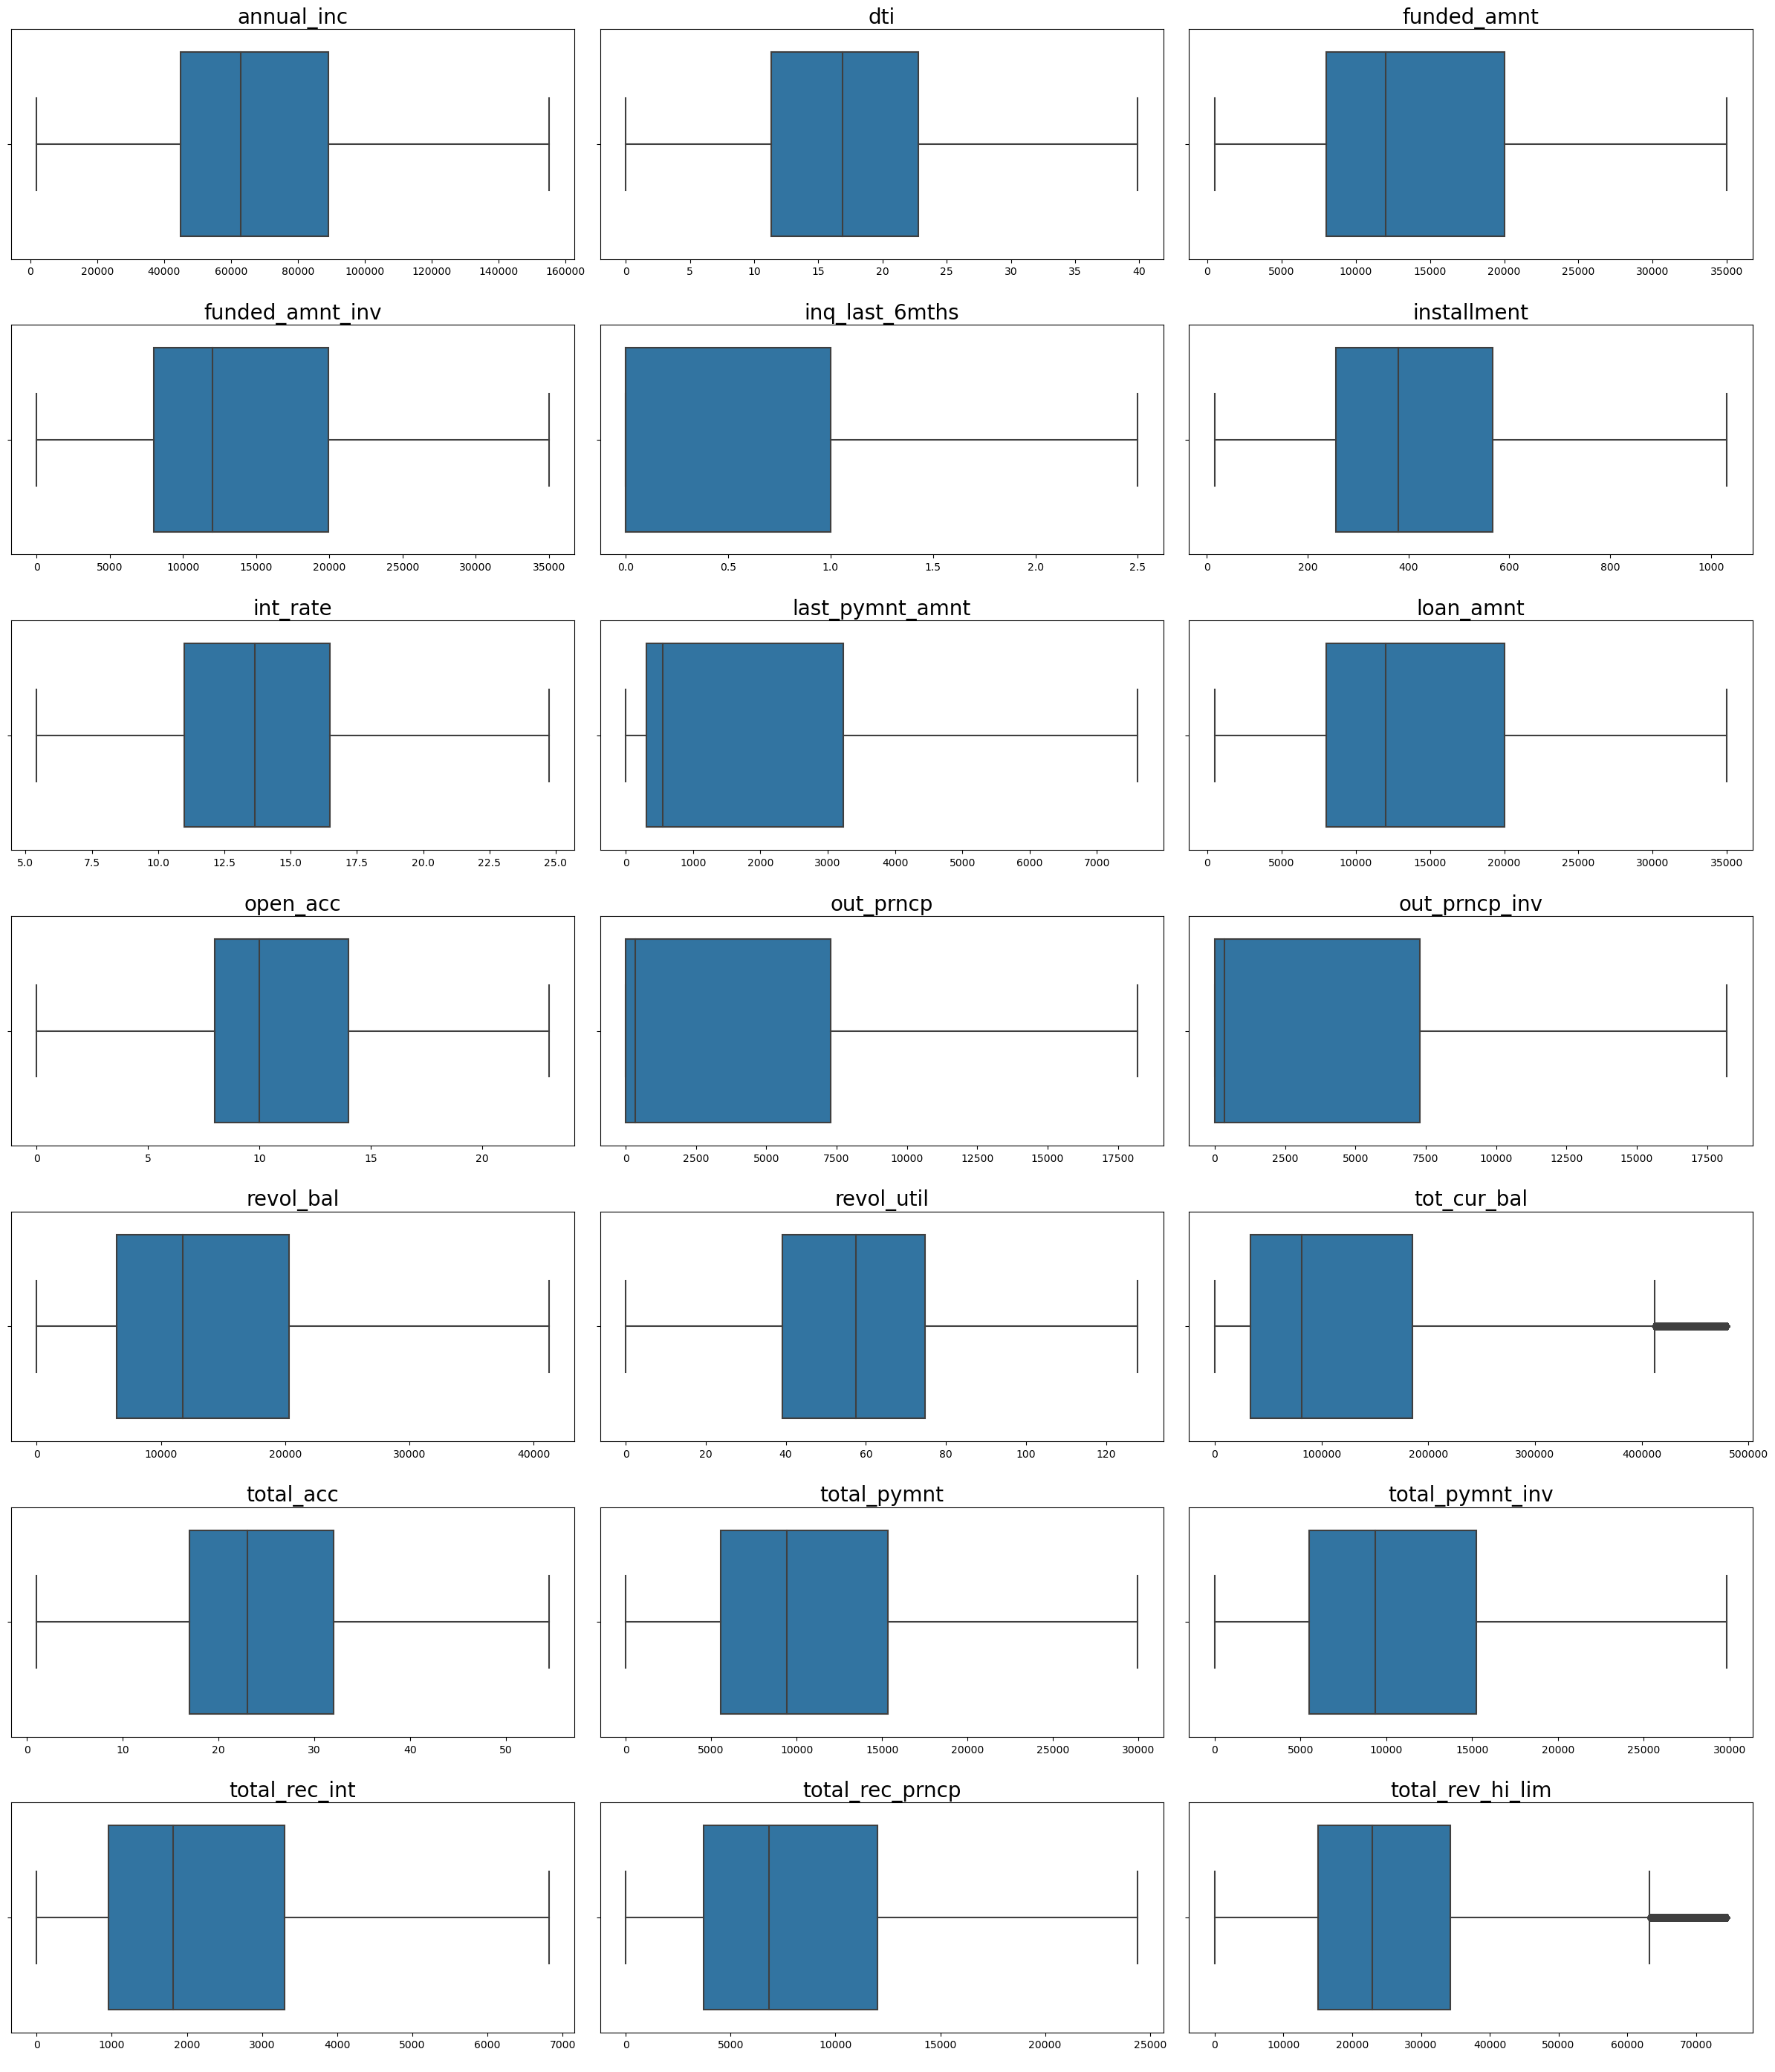

In [135]:
plt.figure(figsize=(24,28))
i = 1
for colname in fiturnumerik:
    plt.subplot(7, 3, i)
    sns.boxplot(x=new_ftdf[list(fiturnumerik)][colname])
    plt.title(colname, fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()
    i += 1

# EDA data kategorik

In [136]:
fitur_kategorik = list(new_ftdf.select_dtypes(include='O').columns)
fitur_kategorik.sort()
fitur_kategorik, len(fitur_kategorik)

(['addr_state',
  'application_type',
  'earliest_cr_line',
  'emp_length',
  'emp_title',
  'grade',
  'home_ownership',
  'initial_list_status',
  'issue_d',
  'last_credit_pull_d',
  'last_pymnt_d',
  'purpose',
  'pymnt_plan',
  'sub_grade',
  'term',
  'title',
  'url',
  'verification_status',
  'zip_code'],
 19)

In [137]:
columns_info = []

for colnames in new_ftdf[fitur_kategorik].columns:
    info = [colnames,
            new_ftdf[colnames].isna().sum(),
            f"{round((new_ftdf[colnames].isna().sum() / new_ftdf[colnames].shape[0]) * 100, 2)}%",
            new_ftdf[colnames].nunique(),
            new_ftdf[colnames].value_counts(),
            new_ftdf[colnames].unique(),
           ]
    
    columns_info.append(info)

In [138]:
info_kategorik = pd.DataFrame(data = columns_info, 
                                  columns = ['col names', 'null values', '% null values', 'n unqiue', 'val count','unique'])
info_kategorik

,col names,null values,% null values,n unqiue,val count,unique
0,addr_state,0,0.0%,50,"CA 71137 NY 40046 TX 36258 FL 31496 IL 18559 NJ 17966 PA 16337 OH 15175 GA 14911 VA 14152 NC 12625 MI 11498 MA 11029 MD 10931 AZ 10660 WA 10462 CO 9699 MN 8133 MO 7477 CT 7183 IN 6492 NV 6491 TN 5948 OR 5933 WI 5894 AL 5827 SC 5564 LA 5461 KY 4421 KS 4178 OK 4104 AR 3476 UT 3417 NM 2578 HI 2478 WV 2397 NH 2223 RI 2039 DC 1424 MT 1386 DE 1262 AK 1246 MS 1215 WY 1124 SD 977 VT 902 IA 14 NE 14 ID 12 ME 4 Name: addr_state, dtype: int64","[AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT, UT, FL, NY, PA, MN, NJ, KY, OH, SC, RI, LA, MA, WA, WI, AL, CO, KS, NV, AK, MD, WV, VT, MI, DC, SD, NH, AR, NM, MT, HI, WY, OK, DE, MS, TN, IA, NE, ID, IN, ME]"
1,application_type,0,0.0%,1,"INDIVIDUAL 464235 Name: application_type, dtype: int64",[INDIVIDUAL]
2,earliest_cr_line,29,0.01%,663,Oct-00 3664 Aug-00 3583 Aug-01 3442 Oct-99 3390 Oct-01 3315 Nov-99 3307 Nov-00 3247 Sep-00 3241 Aug-99 3116 Sep-99 3114 Sep-01 3050 Oct-02 3010 Dec-99 2958 Dec-00 2945 Nov-98 2889 Dec-98 2870 Oct-98 2845 Aug-02 2844 Sep-02 2836 Jul-00 2824 May-01 2801 Jul-01 2787 Jan-01 2782 Nov-01 2781 May-00 2767 Sep-98 2765 Mar-01 2748 Dec-01 2720 Mar-00 2719 Jun-01 2706 Jan-00 2674 Jun-00 2654 Feb-00 2633 Oct-03 2597 Aug-98 2574 Sep-03 2570 Apr-01 2533 Jul-99 2526 Mar-99 2490 Dec-97 2451 Apr-00 2446 Oct-97 2433 Jul-02 2428 Feb-01 2423 Jan-02 2414 Jun-99 2405 Nov-97 2395 May-99 2375 Aug-03 2338 Nov-02 2315 Nov-96 2312 Jan-99 2297 May-02 2284 Feb-99 2253 Oct-96 2228 Mar-02 2227 Sep-97 2223 Jul-03 2216 Sep-04 2188 Sep-95 2149 Apr-02 2143 Feb-02 2143 Oct-95 2135 Jul-98 2131 Nov-03 2126 Jun-02 2120 Dec-02...,"[Jan-85, Apr-99, Nov-01, Feb-96, Jan-96, Nov-04, Jul-05, Jan-07, Apr-04, Sep-04, Jan-98, Oct-89, Jul-03, May-91, Sep-07, Oct-98, Aug-93, Oct-03, Jan-01, Nov-97, Feb-83, Jul-85, Apr-03, Jun-01, Feb-02, Aug-84, Nov-06, Dec-87, Nov-81, Feb-97, Apr-05, Oct-07, Dec-00, Apr-07, Dec-01, Jan-03, Mar-94, Sep-98, Jun-04, Nov-95, Jul-99, Jun-95, Sep-92, Jan-02, Apr-92, Oct-06, May-00, Dec-98, Dec-04, Oct-00, May-02, May-06, Jul-02, Jul-06, May-97, Oct-05, Apr-95, Oct-02, Jan-00, Apr-00, Dec-94, Sep-05, Dec-84, Dec-99, Nov-03, Jun-89, Jun-03, Oct-96, May-03, Jun-02, Jun-07, Dec-96, Feb-84, Sep-02, Jan-86, May-98, Jan-97, Jun-05, Feb-90, Mar-04, Jul-95, Aug-94, Jun-92, Mar-97, Apr-06, Apr-90, Aug-99, Sep-00, Feb-01, Dec-88, Feb-99, Dec-91, Aug-00, Oct-04, Aug-04, Feb-05, Nov-05, Nov-00, May-07, Jan-91, ...]"
3,emp_length,20891,4.5%,11,"10+ years 149413 2 years 41208 3 years 36429 < 1 year 36096 5 years 30650 1 year 29485 4 years 27901 7 years 26066 6 years 26012 8 years 22291 9 years 17793 Name: emp_length, dtype: int64","[10+ years, < 1 year, 1 year, 3 years, 8 years, 9 years, 4 years, 5 years, 6 years, 2 years, 7 years, nan]"
4,emp_title,27445,5.91%,204866,Teacher 5366 Manager 4402 Registered Nurse 2307 RN 2198 Supervisor 1949 Project Manager 1619 Sales 1616 Owner 1515 Office Manager 1381 manager 1295 Driver 1282 General Manager ...,"[nan, Ryder, AIR RESOURCES BOARD, University Medical Group, Veolia Transportaton, Southern Star Photography, MKC Accounting , Starbucks, Southwest Rural metro, UCLA, Va. Dept of Conservation/Recreation, Target, SFMTA, Internal revenue Service, Chin's Restaurant, Duracell, Connection Inspection, Network Interpreting Service, Archdiocese of Galveston Houston, Osram Sylvania, Value Air, Wells Fargo Bank, bmg-educational, Winfield Pathology Consultants, nyc transit, Frito Lay, Shands Hospital at the University of Fl, Oakridge homes, Audubon Mutual Housing Corporation, US Legal Support, Good Samaritan Society, GREG BARRETT DRYWALL, Sharp Lawn Inc., Department of Justice, Gateway Hospice, Cox Communications, United States Infrastructure Corporation, Nucor Building Systems, John Wiley Jr., citizens bank, Stewart Enterprises, Inc., golfers warehouse, STERIS Corporation, Costco Wholesale Corp., Helicoil, cognizant technology solutions, Caterpillar Inc., City of Santa Monica , Aerotek Scien

# Peubah kategorik yang akan dipilih adalah initial_list_status, pymnt_plan, term, dan verification_status

In [139]:
fiturkategorik_pilih = ["initial_list_status", "pymnt_plan", "term", "verification_status"]

In [140]:
fitur = fiturkategorik_pilih + fiturnumerik
fitur.sort()
fitur, len(fitur)

(['annual_inc',
  'dti',
  'funded_amnt',
  'funded_amnt_inv',
  'initial_list_status',
  'inq_last_6mths',
  'installment',
  'int_rate',
  'last_pymnt_amnt',
  'loan_amnt',
  'open_acc',
  'out_prncp',
  'out_prncp_inv',
  'pymnt_plan',
  'revol_bal',
  'revol_util',
  'term',
  'tot_cur_bal',
  'total_acc',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_int',
  'total_rec_prncp',
  'total_rev_hi_lim',
  'verification_status'],
 25)

In [141]:
for colname in new_ftdf:
    if colname not in fitur:
        new_ftdf.drop(labels=[colname], inplace = True, axis = 1)

In [143]:
new_ftdf.shape

(464235, 25)

In [144]:
new_ftdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464235 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   annual_inc           464235 non-null  float64
 1   dti                  464235 non-null  float64
 2   funded_amnt          464235 non-null  int64  
 3   funded_amnt_inv      464235 non-null  float64
 4   initial_list_status  464235 non-null  object 
 5   inq_last_6mths       464235 non-null  float64
 6   installment          464235 non-null  float64
 7   int_rate             464235 non-null  float64
 8   last_pymnt_amnt      464235 non-null  float64
 9   loan_amnt            464235 non-null  int64  
 10  open_acc             464235 non-null  float64
 11  out_prncp            464235 non-null  float64
 12  out_prncp_inv        464235 non-null  float64
 13  pymnt_plan           464235 non-null  object 
 14  revol_bal            464235 non-null  float64
 15  revol_util       

In [145]:
new_ftdf.isna().sum()

annual_inc             0
dti                    0
funded_amnt            0
funded_amnt_inv        0
initial_list_status    0
inq_last_6mths         0
installment            0
int_rate               0
last_pymnt_amnt        0
loan_amnt              0
open_acc               0
out_prncp              0
out_prncp_inv          0
pymnt_plan             0
revol_bal              0
revol_util             0
term                   0
tot_cur_bal            0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_int          0
total_rec_prncp        0
total_rev_hi_lim       0
verification_status    0
dtype: int64

In [146]:
new_ftdf['loan_status'] = y

In [147]:
new_ftdf.head(5)

,annual_inc,dti,funded_amnt,funded_amnt_inv,initial_list_status,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,out_prncp,out_prncp_inv,pymnt_plan,revol_bal,revol_util,term,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,verification_status,loan_status
0,24000.0,27.65,5000,4975.0,f,1.0,162.87,10.65,171.62,5000,3.0,0.0,0.0,n,13648.0,83.7,36 months,81655.0,9.0,5861.071414,5831.78,861.07,5000.00,22900.0,Verified,1
1,30000.0,1.00,2500,2500.0,f,2.5,59.83,15.27,119.66,2500,3.0,0.0,0.0,n,1687.0,9.4,60 months,81655.0,4.0,1008.710000,1008.71,435.17,456.46,22900.0,Source Verified,0
2,12252.0,8.72,2400,2400.0,f,2.0,84.33,15.96,649.91,2400,2.0,0.0,0.0,n,2956.0,98.5,36 months,81655.0,10.0,3003.653644,3003.65,603.65,2400.00,22900.0,Not Verified,1
3,49200.0,20.00,10000,10000.0,f,1.0,339.31,13.49,357.48,10000,10.0,0.0,0.0,n,5598.0,21.0,36 months,81655.0,37.0,12226.302210,12226.30,2209.33,10000.00,22900.0,Source Verified,1
4,80000.0,17.94,3000,3000.0,f,0.0,67.79,12.69,67.79,3000,15.0,766.9,766.9,n,27783.0,53.9,60 months,81655.0,38.0,3242.170000,3242.17,1009.07,2233.10,22900.0,Source Verified,1


In [148]:
new_ftdf['loan_status'].value_counts()

1    408965
0     55270
Name: loan_status, dtype: int64

# Hot one decoding untuk fitur kategorik

In [149]:
y = new_ftdf['loan_status'] 
X = new_ftdf.drop(labels = ['loan_status'], axis = 1)

In [150]:
X = pd.get_dummies(X, columns = ["initial_list_status", "pymnt_plan", "term", "verification_status"], prefix_sep='__')

In [152]:
X.head(5)

,annual_inc,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,out_prncp,out_prncp_inv,revol_bal,revol_util,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,initial_list_status__f,initial_list_status__w,pymnt_plan__n,pymnt_plan__y,term__ 36 months,term__ 60 months,verification_status__Not Verified,verification_status__Source Verified,verification_status__Verified
0,24000.0,27.65,5000,4975.0,1.0,162.87,10.65,171.62,5000,3.0,0.0,0.0,13648.0,83.7,81655.0,9.0,5861.071414,5831.78,861.07,5000.00,22900.0,1,0,1,0,1,0,0,0,1
1,30000.0,1.00,2500,2500.0,2.5,59.83,15.27,119.66,2500,3.0,0.0,0.0,1687.0,9.4,81655.0,4.0,1008.710000,1008.71,435.17,456.46,22900.0,1,0,1,0,0,1,0,1,0
2,12252.0,8.72,2400,2400.0,2.0,84.33,15.96,649.91,2400,2.0,0.0,0.0,2956.0,98.5,81655.0,10.0,3003.653644,3003.65,603.65,2400.00,22900.0,1,0,1,0,1,0,1,0,0
3,49200.0,20.00,10000,10000.0,1.0,339.31,13.49,357.48,10000,10.0,0.0,0.0,5598.0,21.0,81655.0,37.0,12226.302210,12226.30,2209.33,10000.00,22900.0,1,0,1,0,1,0,0,1,0
4,80000.0,17.94,3000,3000.0,0.0,67.79,12.69,67.79,3000,15.0,766.9,766.9,27783.0,53.9,81655.0,38.0,3242.170000,3242.17,1009.07,2233.10,22900.0,1,0,1,0,0,1,0,1,0


# Spilt dataset menjadi train dan test data : 80:20

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((371388, 30), (92847, 30), (371388,), (92847,))

# Feature Scaling

In [154]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_trainScale = scaler.transform(X_train)
X_testScale = scaler.transform(X_test)

# SMOTE untuk masalah imbalance data



In [156]:
sm = SMOTE(random_state=25)

sm.fit(X_trainScale, y_train)

X_smote, y_smote = sm.fit_resample(X_trainScale, y_train)

X_smote.shape, X_trainScale.shape, y_smote.shape, y_train.shape

((654344, 30), (371388, 30), (654344,), (371388,))

# Regresi Logistik

In [157]:
logistik = LogisticRegression(random_state = 25, max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1) 
logistik.fit(X_smote, y_smote)

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   random_state=25, solver='sag')

In [158]:
logistik.score(X_smote, y_smote), logistik.score(X_testScale, y_test)

(0.8900761678872275, 0.9349898219651686)

# Evaluasi Model (Accuracy, Recall, Precision, AUC)

In [159]:
y_pred_proba = logistik.predict_proba(X_testScale)
y_pred = logistik.predict(X_testScale)

In [160]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba[:, 1])

In [161]:
print(accuracy)
print(recall)
print(precision)
print(AUC)

0.9349898219651686
0.9523308840609832
0.9732978470842548
0.9365638338181725


In [163]:
report = classification_report(y_true = y_test, y_pred = logistik.predict(X_testScale))
print(report)

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     11054
           1       0.97      0.95      0.96     81793

    accuracy                           0.93     92847
   macro avg       0.83      0.88      0.85     92847
weighted avg       0.94      0.93      0.94     92847



# Confusion Matrix 

In [164]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = logistik.predict(X_testScale ))

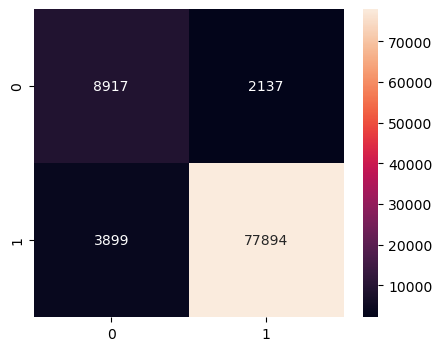

In [165]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g")
plt.show()